In [1]:
###Impotar paquetes


import pandas as pd
import numpy as np
import sympy as s
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tabla=pd.read_csv("datoscromosfericos.csv") ### Lectura de los datos
print(tabla.info)
nombrecolumnas = tabla.columns.values
tabla.index.name='Numero de espectro'    ## nombrando los indices
tabla.columns.name='Caracteristicas de espectro' ##nombrando los indices de las columnas 
print(nombrecolumnas)

<bound method DataFrame.info of       Unnamed: 0     obsid                           fitsname    snrg    snrr  \
0              0    102084     spec-55859-F5902_sp02-084.fits   54.80   78.63   
1              1    103019     spec-55859-F5902_sp03-019.fits   66.33   99.07   
2              2    103025     spec-55859-F5902_sp03-025.fits   55.40   84.64   
3              3    103032     spec-55859-F5902_sp03-032.fits  387.09  455.38   
4              4    103110     spec-55859-F5902_sp03-110.fits   53.28   76.25   
...          ...       ...                                ...     ...     ...   
4995        4995  18803047  spec-55916-F5591604_sp03-047.fits   58.70   80.28   
4996        4996  18803059  spec-55916-F5591604_sp03-059.fits   56.39   71.56   
4997        4997  18803063  spec-55916-F5591604_sp03-063.fits   78.30  116.71   
4998        4998  18803070  spec-55916-F5591604_sp03-070.fits   98.43  139.79   
4999        4999  18803087  spec-55916-F5591604_sp03-087.fits   78.06   99.37

In [3]:
##elimando una columna repetida que no aporta información
nombrecolumnas[0]='borr'
tabla.reindex(columns=nombrecolumnas)
tabla.columns
print(tabla.info)
#del tabla['borr']
#tabla.drop(['borr'],axis=1)

<bound method DataFrame.info of Caracteristicas de espectro  borr     obsid  \
Numero de espectro                            
0                               0    102084   
1                               1    103019   
2                               2    103025   
3                               3    103032   
4                               4    103110   
...                           ...       ...   
4995                         4995  18803047   
4996                         4996  18803059   
4997                         4997  18803063   
4998                         4998  18803070   
4999                         4999  18803087   

Caracteristicas de espectro                           fitsname    snrg  \
Numero de espectro                                                       
0                               spec-55859-F5902_sp02-084.fits   54.80   
1                               spec-55859-F5902_sp03-019.fits   66.33   
2                               spec-55859-F5902_sp03-025.fi

In [4]:
tabla.describe()

Caracteristicas de espectro,borr,obsid,snrg,snrr,teff,teff_err,logg,logg_err,feh,feh_err,...,S_tri,S_tri_err,S_MWL,S_MWL_err,H_mean_rec,H_mean_rec_err,K_mean_rec,K_mean_rec_err,S_rec,S_rec_err
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,8.264929e+06,75.122072,111.155474,5942.668248,32.655850,4.259297,0.046041,-0.142041,0.027444,...,0.248005,-27.981340,0.194634,-27.984753,492.279823,33.660284,438.011095,38.587159,0.244747,-27.976972
std,1443.520003,6.459866e+06,37.504852,52.571105,412.042352,6.955173,0.181108,0.010113,0.240283,0.006331,...,0.044251,528.409776,0.034728,528.409595,1225.624029,147.238854,1088.908278,41.865508,0.045103,528.410007
min,0.000000,1.020840e+05,50.000000,71.430000,4802.020000,10.260000,3.691000,0.013000,-0.994000,0.006000,...,0.122574,-9999.000000,0.096196,-9999.000000,3.746629,-9999.000000,3.353239,0.494952,0.117571,-9999.000000
25%,1249.750000,1.316063e+06,56.330000,84.767500,5670.380000,28.160000,4.133000,0.040000,-0.300000,0.024000,...,0.220155,0.010517,0.172778,0.008254,151.943703,15.810455,130.982440,16.936695,0.216441,0.013415
50%,2499.500000,8.308176e+06,64.670000,98.115000,5940.315000,31.760000,4.228000,0.045000,-0.126000,0.027000,...,0.240573,0.014786,0.188802,0.011604,253.258075,25.061074,220.538909,27.149124,0.237210,0.018841
75%,3749.250000,1.470602e+07,79.725000,118.920000,6247.597500,36.202500,4.359000,0.051000,0.027000,0.031000,...,0.266516,0.019929,0.209162,0.015640,462.737942,41.279476,406.893648,45.051197,0.263405,0.025414
max,4999.000000,1.880309e+07,657.600000,944.640000,6799.830000,68.810000,4.865000,0.095000,0.597000,0.057000,...,0.815786,0.092824,0.640229,0.072849,52095.037161,968.550495,45142.655884,1062.263856,0.826853,0.118067


In [5]:
#### Revision por si hay valores NAN
tabla.isnull().values.any()
tabla.isnull().sum()

Caracteristicas de espectro
borr               0
obsid              0
fitsname           0
snrg               0
snrr               0
teff               0
teff_err           0
logg               0
logg_err           0
feh                0
feh_err            0
rv                 0
rv_err             0
ra_obs             0
dec_obs            0
gaia_source_id     5
gaia_g_mean_mag    5
figname            0
R_mean             0
R_mean_err         0
V_mean             0
V_mean_err         0
H_mean_tri         0
H_mean_tri_err     0
K_mean_tri         0
K_mean_tri_err     0
S_tri              0
S_tri_err          0
S_MWL              0
S_MWL_err          0
H_mean_rec         0
H_mean_rec_err     0
K_mean_rec         0
K_mean_rec_err     0
S_rec              0
S_rec_err          0
condition_tag      0
dtype: int64

In [6]:
tabla.isnull().sum()

Caracteristicas de espectro
borr               0
obsid              0
fitsname           0
snrg               0
snrr               0
teff               0
teff_err           0
logg               0
logg_err           0
feh                0
feh_err            0
rv                 0
rv_err             0
ra_obs             0
dec_obs            0
gaia_source_id     5
gaia_g_mean_mag    5
figname            0
R_mean             0
R_mean_err         0
V_mean             0
V_mean_err         0
H_mean_tri         0
H_mean_tri_err     0
K_mean_tri         0
K_mean_tri_err     0
S_tri              0
S_tri_err          0
S_MWL              0
S_MWL_err          0
H_mean_rec         0
H_mean_rec_err     0
K_mean_rec         0
K_mean_rec_err     0
S_rec              0
S_rec_err          0
condition_tag      0
dtype: int64

### Los parametros donde tiene el NAN es referente al catalogo GAIA DR2, lo cual son interesantes
### ya que posiblemente no esten registradas esas fuentes(Pues si no lo revisaron los autores)
### Por lo que seran borrados y mas adelante se analizara esos conjuntos de datos con el dataset mas grande

In [7]:
### Borrado de datos 
tabla = tabla.dropna()
###verificacion si ahora el dataframe tiene NAN
tabla.isnull().values.any()


False

In [8]:
###Significado de cada columna

temperatura_efectiva = tabla["teff"]
error_temperatura_efectiva=tabla["teff_err"]
gravedad=tabla["logg"]
error_gravedad=tabla["logg_err"]
metalicidad=tabla["feh"]
error_metalicidad=tabla["feh_err"]


###tabla numerica

tabla_numerica=tabla.drop(["gaia_source_id","fitsname","figname","condition_tag"], axis=1)
tabla_numerica.isna().all()



Caracteristicas de espectro
borr                True
obsid              False
snrg               False
snrr               False
teff               False
teff_err           False
logg               False
logg_err           False
feh                False
feh_err            False
rv                 False
rv_err             False
ra_obs             False
dec_obs            False
gaia_g_mean_mag    False
R_mean             False
R_mean_err         False
V_mean             False
V_mean_err         False
H_mean_tri         False
H_mean_tri_err     False
K_mean_tri         False
K_mean_tri_err     False
S_tri              False
S_tri_err          False
S_MWL              False
S_MWL_err          False
H_mean_rec         False
H_mean_rec_err     False
K_mean_rec         False
K_mean_rec_err     False
S_rec              False
S_rec_err          False
dtype: bool

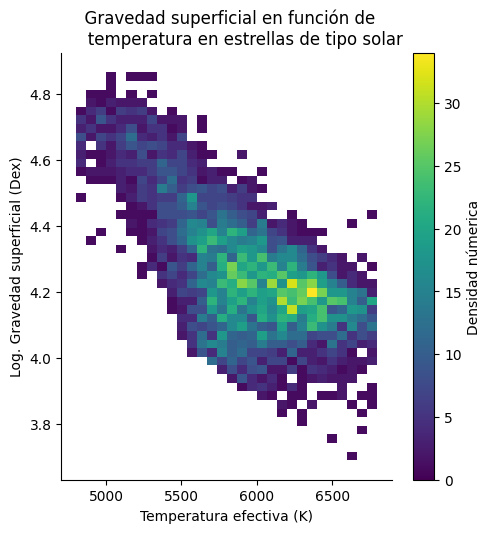

In [14]:
fig=sns.displot(data=tabla,x="teff",y="logg",cmap="viridis",cbar=True,cbar_kws={'label': 'Densidad númerica'})
fig.set(xlabel='Temperatura efectiva (K)',
       ylabel='Log. Gravedad superficial (Dex)',
       title="""  Gravedad superficial en función de 
       temperatura en estrellas de tipo solar""")

plt.savefig("secuencia_principal.pdf",bbox_inches='tight')



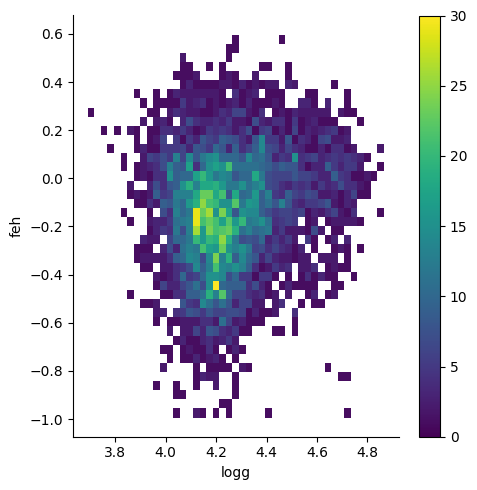

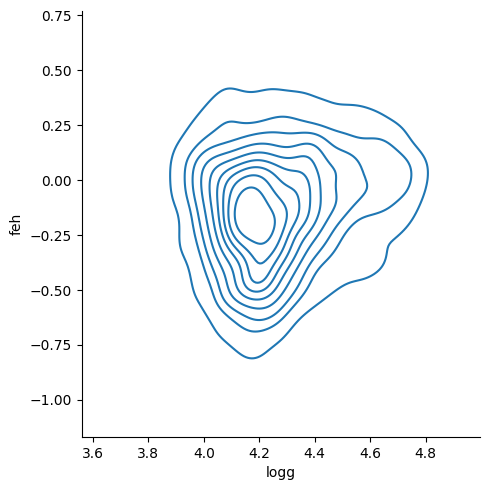

In [10]:
sns.displot(data=tabla_numerica,x="logg",y="feh", cbar=True,cmap="viridis")
sns.displot(data=tabla_numerica,x="logg",y="feh",kind="kde")

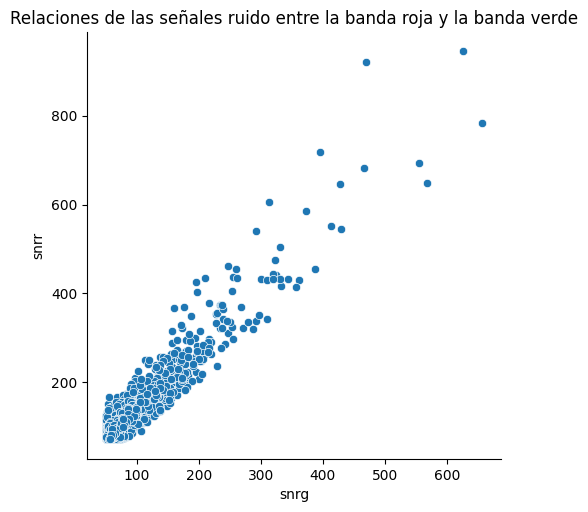

In [11]:
sns.relplot(data=tabla, x="snrg",y="snrr")
plt.title("Relaciones de las señales ruido entre la banda roja y la banda verde")
#plt.savefig('señalesruido.pdf',bbox_inches='tight')



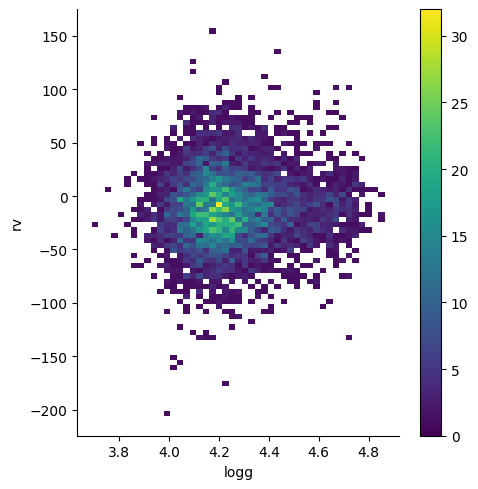

In [12]:
sns.displot(data=tabla_numerica,x="logg",y="rv",cbar=True, cmap="viridis")

1.3047869845619968 13.136296670676828


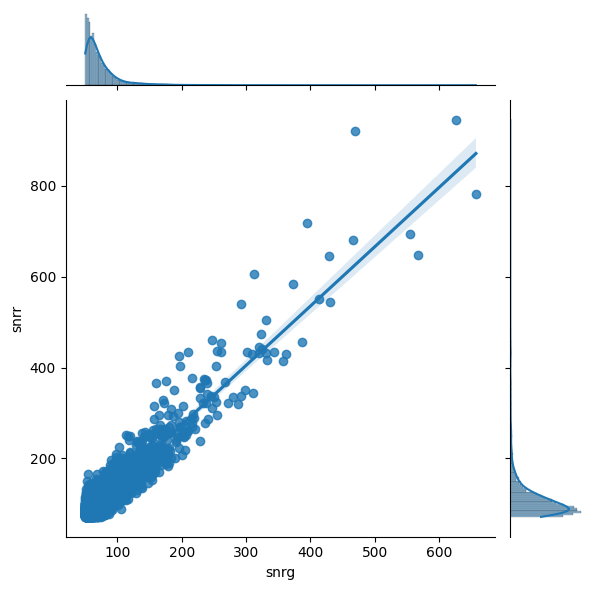

In [13]:
pendiente, intercepto,r_valor,p_valor,std_error=sc.stats.linregress(tabla["snrg"],tabla["snrr"]) 
sns.jointplot(data=tabla, x="snrg", y="snrr", kind="reg")
#plt.savefig('regresion.pdf',bbox_inches='tight')

print(pendiente, intercepto)


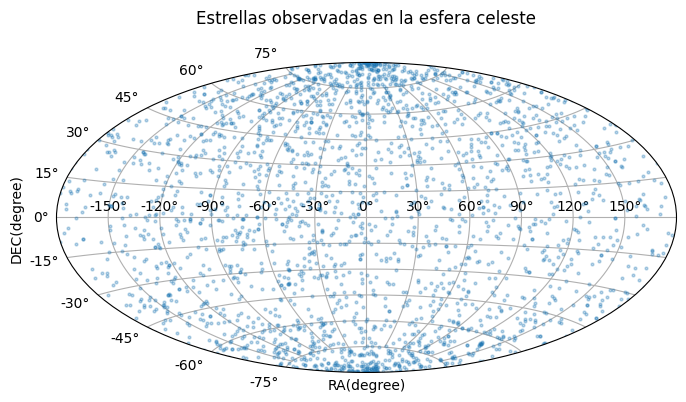

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4.2))
plt.subplot(111, projection="aitoff")
plt.title("Estrellas observadas en la esfera celeste",y=1.1)
plt.grid(True)
plt.plot(tabla["dec_obs"], tabla["ra_obs"], 'o', markersize=2, alpha=0.3)
plt.ylabel("DEC(degree)")
plt.xlabel("RA(degree)")

plt.subplots_adjust(top=0.95,bottom=0.0)


plt.savefig('esferaceleste.pdf',bbox_inches='tight')
plt.show()
